# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

In [3]:
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [4]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [5]:
heroes_df.drop(['Unnamed: 0'], axis=1, inplace=True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [6]:
powers_df.columns

Index(['hero_names', 'Agility', 'Accelerated Healing', 'Lantern Power Ring',
       'Dimensional Awareness', 'Cold Resistance', 'Durability', 'Stealth',
       'Energy Absorption', 'Flight',
       ...
       'Web Creation', 'Reality Warping', 'Odin Force', 'Symbiote Costume',
       'Speed Force', 'Phoenix Force', 'Molecular Dissipation',
       'Vision - Cryo', 'Omnipresent', 'Omniscient'],
      dtype='object', length=168)

## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [7]:
heroes_df.info()
powers_df.info()
heroes_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________
For weight and height - all '-99' values will be replaced with the median value as there are too many to delete. Null values in weight column will be replaced with the median value.

In categorical columns, the '-' will be replaced with the word 'missing'. Duplicate super heroes (as noted by their name) will be dropped. Null values will also be replaced with 'missing' for categorical columns.



In [8]:
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

-99.0     0.323770
 79.0     0.031421
 54.0     0.031421
 81.0     0.030055
 90.0     0.025956
            ...   
 132.0    0.001366
 38.0     0.001366
 412.0    0.001366
 320.0    0.001366
 855.0    0.001366
Name: Weight, Length: 135, dtype: float64
count    732.000000
mean      43.855191
std      130.823733
min      -99.000000
25%      -99.000000
50%       62.000000
75%       90.000000
max      900.000000
Name: Weight, dtype: float64


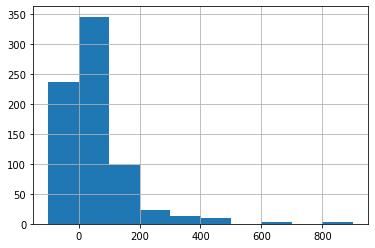

In [9]:
print(heroes_df['Weight'].value_counts(normalize=True))
print(heroes_df['Weight'].describe())
heroes_df['Weight'].hist()

-99.0     0.295640
 183.0    0.080381
 188.0    0.069482
 178.0    0.053134
 180.0    0.051771
 185.0    0.047684
 175.0    0.046322
 168.0    0.039510
 170.0    0.035422
 165.0    0.035422
 191.0    0.028610
 193.0    0.028610
 198.0    0.024523
 173.0    0.023161
 201.0    0.014986
 196.0    0.014986
 163.0    0.010899
 213.0    0.009537
 203.0    0.006812
 211.0    0.006812
 157.0    0.006812
 244.0    0.005450
 229.0    0.004087
 155.0    0.004087
 218.0    0.004087
 226.0    0.004087
 122.0    0.002725
 206.0    0.002725
 279.0    0.002725
 366.0    0.002725
 137.0    0.002725
 30.5     0.002725
 305.0    0.002725
 61.0     0.001362
 975.0    0.001362
 142.0    0.001362
 287.0    0.001362
 267.0    0.001362
 304.8    0.001362
 701.0    0.001362
 876.0    0.001362
 259.0    0.001362
 15.2     0.001362
 297.0    0.001362
 257.0    0.001362
 62.5     0.001362
 66.0     0.001362
 160.0    0.001362
 140.0    0.001362
 234.0    0.001362
 71.0     0.001362
 79.0     0.001362
 108.0    0.

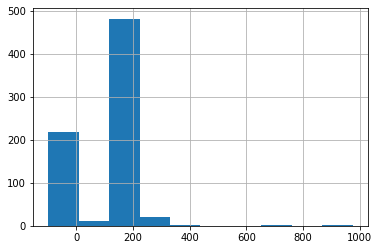

In [10]:
print(heroes_df['Height'].value_counts(normalize=True))
print(heroes_df['Height'].describe())
heroes_df['Height'].hist()

In [11]:
heroes_df['name'].value_counts()

Spider-Man      3
Goliath         3
Firestorm       2
Blizzard        2
Nova            2
               ..
Harley Quinn    1
Hawkwoman II    1
Jubilee         1
Beast Boy       1
Genesis         1
Name: name, Length: 715, dtype: int64

In [12]:
heroes_df['Weight'].fillna(heroes_df['Weight'].median(), inplace=True)
heroes_df['Publisher'].fillna('missing', inplace=True)
heroes_df['Weight'].replace(-99.0, heroes_df['Weight'].median(), inplace=True)
heroes_df['Height'].replace(-99.0, heroes_df['Height'].median(), inplace=True)


In [21]:
heroes_df['Publisher'].value_counts(normalize=True)

Marvel Comics        0.528610
DC Comics            0.292916
NBC - Heroes         0.025886
Dark Horse Comics    0.024523
missing              0.020436
George Lucas         0.019074
Image Comics         0.019074
Star Trek            0.008174
HarperCollins        0.008174
Team Epic TV         0.006812
SyFy                 0.006812
Shueisha             0.005450
ABC Studios          0.005450
Icon Comics          0.005450
IDW Publishing       0.005450
Wildstorm            0.004087
Sony Pictures        0.002725
Universal Studios    0.001362
South Park           0.001362
J. R. R. Tolkien     0.001362
Microsoft            0.001362
Rebellion            0.001362
Titan Books          0.001362
Hanna-Barbera        0.001362
J. K. Rowling        0.001362
Name: Publisher, dtype: float64

In [25]:
cat_columns = ['name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Skin color', 'Alignment']
for col in cat_columns:
    heroes_df[col].replace('-', 'missing', inplace=True)

In [26]:
heroes_df['Race'].value_counts()

missing          304
Human            208
Mutant            63
God / Eternal     14
Cyborg            11
                ... 
Czarnian           1
Martian            1
Luphomoid          1
Bizarro            1
Korugaran          1
Name: Race, Length: 62, dtype: int64

In [50]:
heroes_df.loc[heroes_df['name'] == 'Speedy']

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
617,Speedy,Male,missing,Human,missing,175.0,DC Comics,missing,good,62.0
618,Speedy,Female,green,Human,Brown,175.0,DC Comics,missing,good,62.0


In [39]:
heroes_df['name'].value_counts().head(20)

Spider-Man          3
Goliath             3
Firestorm           2
Blizzard            2
Nova                2
Toxin               2
Blue Beetle         2
Angel               2
Speedy              2
Namor               2
Atlas               2
Captain Marvel      2
Vindicator          2
Batman              2
Black Canary        2
Batgirl             2
Atom                2
Flash III           1
Jessica Cruz        1
Green Goblin III    1
Name: name, dtype: int64

In [44]:
powers_df['hero_names'].value_counts()

Spider-Man       1
Luna             1
Agent Zero       1
Blizzard II      1
Absorbing Man    1
                ..
Callisto         1
Harley Quinn     1
Phantom Girl     1
Jubilee          1
Professor X      1
Name: hero_names, Length: 667, dtype: int64

In [45]:
heroes_no_dups = heroes_df.drop_duplicates()

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [52]:
heroes_no_dups.set_index('name', inplace=True)
powers_df.set_index('hero_names', inplace=True)

In [53]:
joined = heroes_no_dups.join(powers_df, how='inner')

In [63]:
joined.info()
#joined_dummy = joined.reset_index() # a dummy dataframe so I can drop duplicates using hero name and gender
joined_dummy.head()
joined_final = joined_dummy.drop_duplicates(subset=['index','Gender']) 
joined_final

<class 'pandas.core.frame.DataFrame'>
Index: 660 entries, A-Bomb to Zoom
Columns: 176 entries, Gender to Omniscient
dtypes: bool(167), float64(2), object(7)
memory usage: 159.2+ KB


,index,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,missing,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,missing,bad,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,175.0,Marvel Comics,missing,bad,62.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,missing,good,52.0,...,False,False,False,False,False,False,False,False,False,False
656,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,62.0,...,False,False,False,False,False,False,False,False,False,False
657,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0,...,False,False,False,False,False,False,False,False,False,False
658,Zatanna,Female,blue,Human,Black,170.0,DC Comics,missing,good,57.0,...,False,False,False,False,False,False,False,False,False,False


In [64]:
joined_final.set_index('index',inplace=True)
joined_final.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
index,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,missing,good,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,missing,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Cosmic Entity,Black,175.0,Marvel Comics,missing,bad,62.0,False,...,False,False,False,False,False,False,False,False,False,False


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

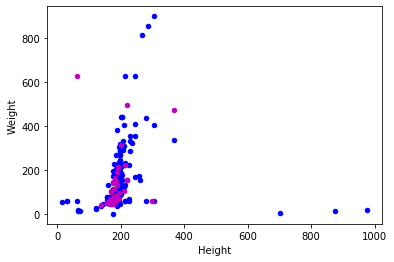

In [73]:
males = joined_final[joined_final['Gender'] == 'Male']
females = joined_final[joined_final['Gender'] == 'Female']
ax1 = males.plot(kind='scatter', x ='Height', y ='Weight', color='b')
ax2 = females.plot(kind='scatter', x ='Height', y = 'Weight', color='m', ax=ax1)


## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [91]:
male_heroes_df = joined_final[joined_final['Gender'] == 'Male']
female_heroes_df = joined_final[joined_final['Gender'] == 'Female']

def show_distplot(dataframe, gender, column_name):
    sns.distplot(dataframe[column_name])
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f"{gender} {column_name} Distribution")
    print(f"Mean: {dataframe[column_name].mean()}")
    print(f"Median: {dataframe[column_name].median()}")
    print(f"Mode: {dataframe[column_name].mode()}")
    print(f"Standard Deviation: {dataframe[column_name].std()}")
    pass

Mean: 188.12114537444933
Median: 183.0
Mode: 0    175.0
dtype: float64
Standard Deviation: 61.29460428421503


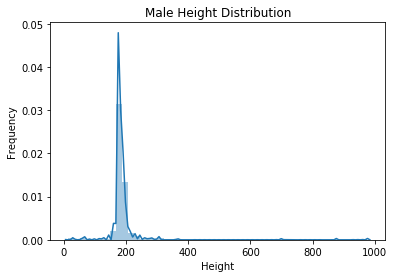

In [92]:
# Male Height
show_distplot(male_heroes_df, 'Male', 'Height')

Mean: 107.68942731277534
Median: 79.0
Mode: 0    62.0
dtype: float64
Standard Deviation: 99.75516616774665


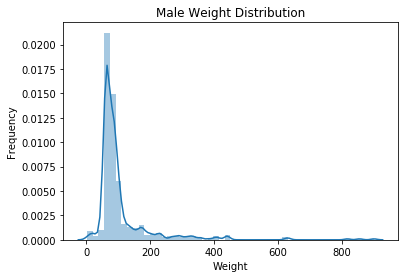

In [93]:
# Male Weight
show_distplot(male_heroes_df, 'Male', 'Weight')

Mean: 174.86079545454547
Median: 175.0
Mode: 0    175.0
dtype: float64
Standard Deviation: 21.398376372137125


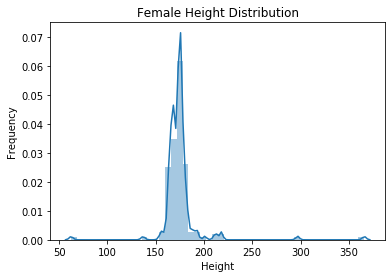

In [94]:
# Female Height
show_distplot(female_heroes_df, 'Female', 'Height')

Mean: 75.74431818181819
Median: 61.0
Mode: 0    62.0
dtype: float64
Standard Deviation: 69.37399654123939


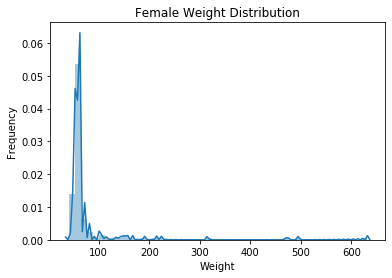

In [95]:
# Female Weight
show_distplot(female_heroes_df, 'Female', 'Weight')

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________
Male height and weight as well as female weight are heavily skewed to the right due to outliers.
Female height is closest to a normal distribution (indicated by having the smallest standard deviation in comparison to the other distributions).
As expected, male hero height and weight on average exceeds that of the female heroes.

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [142]:
list_values = []
for col in powers_df.columns:
    list_values.append(powers_df[col].value_counts().to_list())
    
list_values
list_pwr_names = []
for col in powers_df.columns:
    list_pwr_names.append(col)
    
list_pwr_names
power_dict = dict(zip(list_pwr_names,list_values))
power_dict
power_counts_df = pd.DataFrame(data=power_dict)
power_counts_df.head()
power_final_df = power_counts_df.transpose()
power_final_df.rename(columns={0:'False', 1:'True'}, inplace=True)

In [146]:
power_final_df.head()
power_final_df.sort_values(by=['True'], ascending=False, inplace=True)

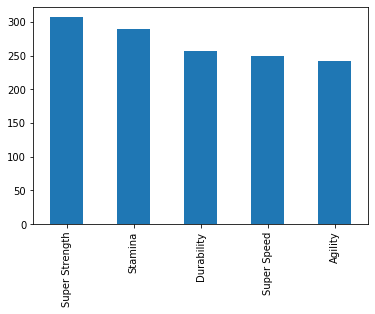

In [152]:
power_final_df['True'].head().plot(kind='bar')

In [193]:
marvel_df = joined_final.loc[joined_final['Publisher'] == 'Marvel Comics']
marvel_df_pwrs = marvel_df.loc[:,'Agility':]
marvel_df_pwrs.head()


,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
index,,,,,,,,,,,,,,,,,,,,,
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Absorbing Man,False,False,False,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Agent Bob,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


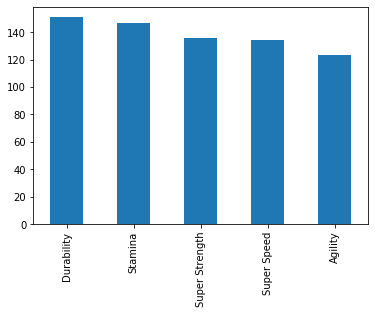

In [216]:
marvel_list_values = []
for col in marvel_df_pwrs.columns:   
    marvel_list_values.append(marvel_df_pwrs[col].value_counts().to_list())
    
marvel_list_values
marvel_list_pwr_names = []
for col in marvel_df_pwrs.columns:
    marvel_list_pwr_names.append(col)
    
marvel_list_pwr_names
marvel_power_dict = dict(zip(marvel_list_pwr_names,marvel_list_values))
marvel_power_dict
marvel_power_counts_df = pd.DataFrame.from_dict(marvel_power_dict, orient='index')
marvel_power_counts_df.head()
marvel_power_counts_df.fillna(0)
marvel_power_counts_df.columns
#marvel_power_final_df = marvel_power_counts_df.transpose()
marvel_power_counts_df.rename(columns={0:'False', 1:'True'}, inplace=True)

marvel_power_counts_df.head()
marvel_power_counts_df.fillna(0, inplace=True)
marvel_power_counts_df.sort_values(by='True', ascending=False, inplace=True)

marvel_power_counts_df['True'].head().plot(kind='bar')

In [218]:
dc_df = joined_final.loc[joined_final['Publisher'] == 'DC Comics']
dc_df_pwrs = dc_df.loc[:,'Agility':]
dc_df_pwrs.head()


,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
index,,,,,,,,,,,,,,,,,,,,,
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Adam Strange,False,False,False,False,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Alan Scott,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
Amazo,True,False,True,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Animal Man,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


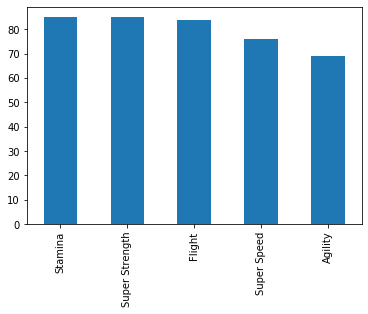

In [219]:
dc_list_values = []
for col in dc_df_pwrs.columns:   
    dc_list_values.append(dc_df_pwrs[col].value_counts().to_list())
    
dc_list_values
dc_list_pwr_names = []
for col in dc_df_pwrs.columns:
    dc_list_pwr_names.append(col)
    
dc_list_pwr_names
dc_power_dict = dict(zip(dc_list_pwr_names, dc_list_values))
dc_power_dict
dc_power_counts_df = pd.DataFrame.from_dict(dc_power_dict, orient='index')
dc_power_counts_df.head()
dc_power_counts_df.fillna(0)
marvel_power_counts_df.columns
#marvel_power_final_df = marvel_power_counts_df.transpose()
dc_power_counts_df.rename(columns={0:'False', 1:'True'}, inplace=True)

dc_power_counts_df.head()
dc_power_counts_df.fillna(0, inplace=True)
dc_power_counts_df.sort_values(by='True', ascending=False, inplace=True)

dc_power_counts_df['True'].head().plot(kind='bar')

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________
There is a greater number of super heroes in the Marvel Universe that have the top 5 powers as compared to the DC universe.  The top 5 powers are the same with the exception being Durability in the Marvel Universe and Flight in the DC Universe.

### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________

What is the distribution of skin colors amongst alien heroes?

Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [230]:
aliens_df = joined_final.loc[joined_final['Race'] != 'Human']

In [232]:
aliens_df['Skin color'].value_counts(normalize=True)

missing           0.859956
green             0.041575
red               0.017505
blue              0.017505
silver            0.010941
white             0.010941
grey              0.008753
gold              0.006565
pink              0.004376
purple            0.004376
yellow            0.004376
blue-white        0.002188
black             0.002188
orange / white    0.002188
red / black       0.002188
orange            0.002188
gray              0.002188
Name: Skin color, dtype: float64

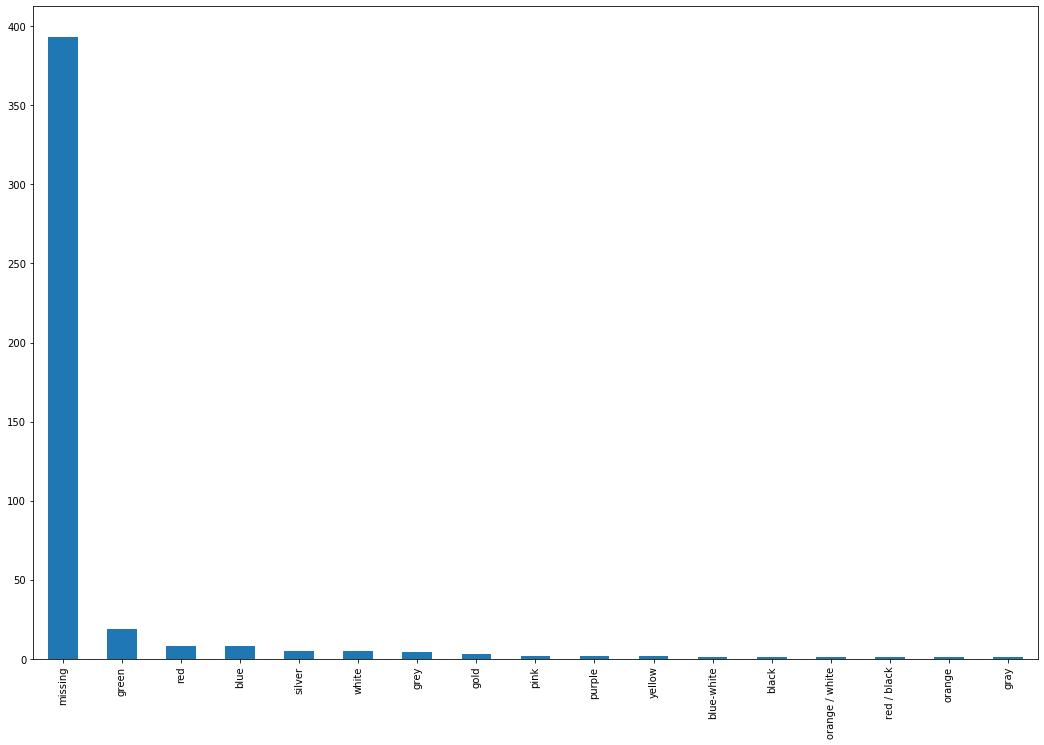

In [236]:
aliens_df['Skin color'].value_counts().plot(kind='bar',figsize=(18,12))

In [237]:
aliens_good = aliens_df.loc[aliens_df['Alignment'] == 'good']
aliens_good['Skin color'].value_counts(normalize=True)

missing           0.886598
green             0.044674
blue              0.017182
red               0.010309
gold              0.006873
pink              0.006873
white             0.006873
silver            0.006873
orange / white    0.003436
grey              0.003436
orange            0.003436
gray              0.003436
Name: Skin color, dtype: float64

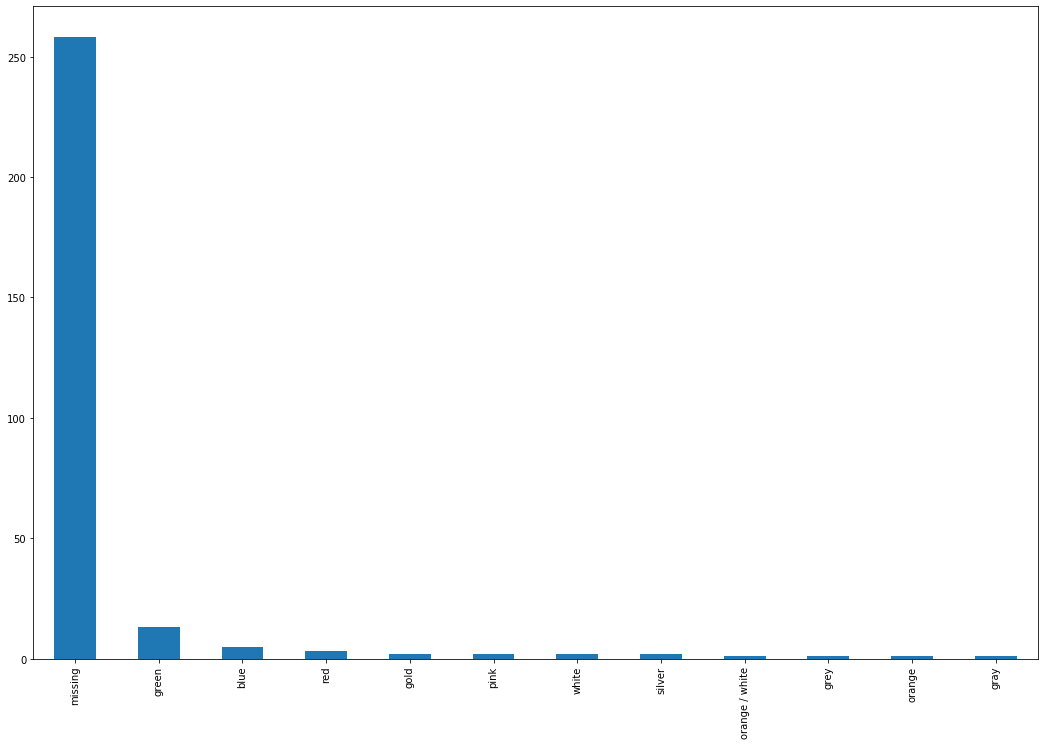

In [239]:
aliens_good['Skin color'].value_counts().plot(kind='bar',figsize=(18,12))

In [240]:
aliens_bad = aliens_df.loc[aliens_df['Alignment'] == 'bad']
aliens_bad['Skin color'].value_counts(normalize=True)

missing        0.848276
green          0.034483
grey           0.020690
red            0.020690
silver         0.020690
white          0.013793
blue           0.013793
black          0.006897
purple         0.006897
red / black    0.006897
yellow         0.006897
Name: Skin color, dtype: float64

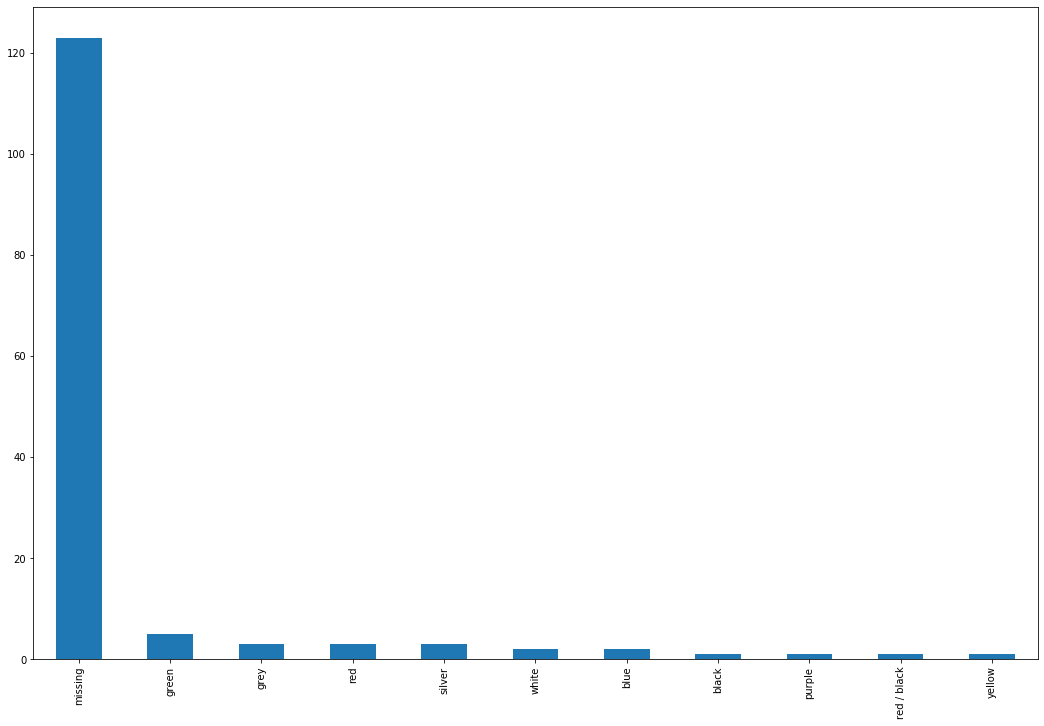

In [243]:
aliens_bad['Skin color'].value_counts().plot(kind='bar', figsize=(18,12))

In [ ]:
# More good aliens are not identified by a skin color as opposed to bad aliens
# The top 3 skin colors for bad aliens are green, gray, and red
# The top 3 skin colors for good aliens are green, blue, and red
# Yellow and Purple skin colors only show up for bad aliens. Pink and gold skin colors only show up for good aliens.

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data